In [18]:
import tensorflow as tf

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.0

1. Input
2. Convolutions
3. Subsampling (Pooling)
4. Convolutions
5. Subsampling (Pooling)
6. Fully Connection (Dense)
7. Fully Connection (Dense)
8. Fully Connection (Output)

In [20]:
import matplotlib.pyplot as plt

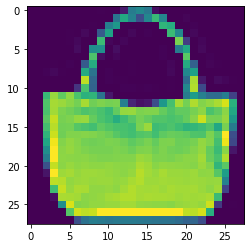

In [21]:
plt.imshow(x_train[100])

In [22]:
model = tf.keras.models.Sequential(
    [
      # 1. Input
      # 2. Convolutions -> 선언 하면서 input_shape (filter 수 : 6)
      tf.keras.layers.Conv2D(6, (5, 5), activation='sigmoid', input_shape=(28, 28, 1) ),
      # 3. Subsampling (Pooling)
      tf.keras.layers.MaxPooling2D((2,2)),
      # 4. Convolutions ( fillter 수 : 16)
      tf.keras.layers.Conv2D(16, (5,5), activation='sigmoid'),
      # 5. Subsampling (Pooling)
      tf.keras.layers.MaxPooling2D((2, 2)),
      # 6. Fully Connection (Dense : 120개) 16 * 5 * 5 -> Flatten 하고 120개로 Fully connection
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(120, activation='sigmoid'),
      # 7. Fully Connection (Dense : 84개)
      tf.keras.layers.Dense(84, activation='sigmoid'),
      # 8. Fully Connection (Output : 10) 10개 class 개수
      tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [23]:
model.build()

In [24]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'] 
)

In [25]:
x_train = x_train[..., tf.newaxis]

In [28]:
x_test = x_test[..., tf.newaxis]

In [32]:
x_test.shape, x_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [29]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3406 - accuracy: 0.5285
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0809 - accuracy: 0.5900
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9695 - accuracy: 0.6360
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8930 - accuracy: 0.6744
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8360 - accuracy: 0.6968


In [31]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) )

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7923 - accuracy: 0.7118 - val_loss: 0.7911 - val_accuracy: 0.7113
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7552 - accuracy: 0.7239 - val_loss: 0.7564 - val_accuracy: 0.7265
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7220 - accuracy: 0.7321 - val_loss: 0.7249 - val_accuracy: 0.7324
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.7389 - val_loss: 0.6975 - val_accuracy: 0.7378
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6690 - accuracy: 0.7444 - val_loss: 0.6815 - val_accuracy: 0.7382
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6499 - accuracy: 0.7490 - val_loss: 0.6596 - val_accuracy: 0.7455
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6333 - accuracy: 0.7547 - val_loss: 0.6440 - val_accuracy:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


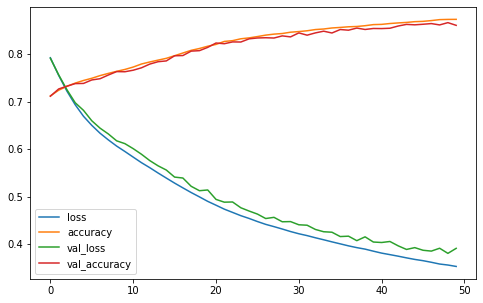

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()